# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Seed фиксируется, чтобы части кода, включающие в себя псевдослучайность (допустим, разбиение на train-test при помощи sklearn), не менялись при перезапуске кода. Это полезно при последовательном применении разных подходов к улучшению модели - если seed не будет фиксированным, то фиттинг модели с новой фичёй может показать улучшение скора, хотя на самом деле это произойдёт из-за нового разбиения на train-test.")

Seed фиксируется, чтобы части кода, включающие в себя псевдослучайность (допустим, разбиение на train-test при помощи sklearn), не менялись при перезапуске кода. Это полезно при последовательном применении разных подходов к улучшению модели - если seed не будет фиксированным, то фиттинг модели с новой фичёй может показать улучшение скора, хотя на самом деле это произойдёт из-за нового разбиения на train-test.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('cars_train.csv')
df_test = pd.read_csv('cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test[:5]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test[-6:-1]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
994,Maruti Swift Dzire VXi,2010,240000,143000,Petrol,Individual,Manual,First Owner,17.5 kmpl,1298 CC,85.8 bhp,114Nm@ 4000rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include="all", datetime_is_numeric=False)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
df_test.describe(include="all", datetime_is_numeric=False)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [9]:
df_train.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [10]:
df_test.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [11]:
print(f'Пропуски в train есть в колонках: {df_train.loc[:, df_train.isna().any()].columns.tolist()}')

Пропуски в train есть в колонках: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [12]:
print(f'Пропуски в test есть в колонках: {df_test.loc[:, df_test.isna().any()].columns.tolist()}')

Пропуски в test есть в колонках: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [13]:
print('Соотвественно, пропуски есть в колонках с деталями об автомобиле, то есть необязательными данными')

Соотвественно, пропуски есть в колонках с деталями об автомобиле, то есть необязательными данными


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [14]:
not_unique = df_train.drop("selling_price", axis=1, inplace=False)
not_unique.duplicated(keep=False).any()

True

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [15]:
not_unique[not_unique.duplicated(subset=None, keep=False)].sort_values("name")

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3291,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
1568,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
361,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [16]:
columns_to_check = [c for c in df_train.columns if c != "selling_price"]
df_train = df_train.drop_duplicates(subset=columns_to_check, keep='first')
df_train.shape

(5840, 13)

In [17]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [18]:
df_train.reset_index(inplace=True)
df_train

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [19]:
# 1 liter = 1 kg => x kmpl = x km/kg
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(x.rstrip(' kmpl').rstrip(' km/kg')) if type(x) != float else x)
df_train['engine'] = df_train['engine'].apply(lambda x: float(x.rstrip(' CC')) if type(x) != float else x)

# Clean the column of the form ' bhp'
df_train['max_power'] = df_train['max_power'].apply(lambda x: 0.0 if x == ' bhp' else x)
df_train['max_power'] = df_train['max_power'].apply(lambda x: float(x.rstrip(' bhp')) if type(x) != float else x)

In [20]:
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(x.rstrip(' kmpl').rstrip(' km/kg')) if type(x) != float else x)
df_test['engine'] = df_test['engine'].apply(lambda x: float(x.rstrip(' CC')) if type(x) != float else x)

df_test['max_power'] = df_test['max_power'].apply(lambda x: 0.0 if x == ' bhp' else x)
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(x.rstrip(' bhp')) if type(x) != float else x)

In [21]:
df_train['torque'] = df_train['torque'].astype(str)
df_train.loc[(~df_train['torque'].str.contains('@')) & ~df_train['torque'].str.contains('at')]['torque']

12        nan
28        nan
69        nan
78        nan
107       nan
        ...  
5697    400Nm
5737      nan
5748      nan
5794      nan
5821      nan
Name: torque, Length: 198, dtype: object

In [22]:
df_train['torque'] = df_train['torque'].apply(lambda x: x.split('@')[0] + x.split('(')[1].split('@')[0] + '@' + x.split('@')[1].split('(')[0] if '(' in x else x)

In [23]:
df_train['torque'] = df_train['torque'].apply(lambda x: x.replace('at', '@').replace('/', '@'))

In [24]:
df_train[['torque', 'max_torque_rpm']] = df_train['torque'].str.split('@', 1, expand=True)

/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_33783/2082379844.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_train[['torque', 'max_torque_rpm']] = df_train['torque'].str.split('@', 1, expand=True)


In [25]:
df_train[['torque', 'max_torque_rpm']]

,torque,max_torque_rpm
0,190Nm,2000rpm
1,250Nm,1500-2500rpm
2,22.4 kgm,1750-2750rpm
3,11.5kgm,"4,500"
4,113.75nm,4000rpm
...,...,...
5835,96.1Nm,3000rpm
5836,90Nm,3500rpm
5837,113.7Nm,4000rpm
5838,24kgm,"1,900-2,750"


In [26]:
NM_KGM_CONSTANT = 9.80665
df_train['torque'] = df_train['torque'].apply(lambda x: x.replace(' ', '').upper().split('(')[0])
df_train['torque'] = df_train['torque'].apply(lambda x: float(x.rstrip('NM')) if 'NM' in x else float(x.rstrip('KGM')) * NM_KGM_CONSTANT)

In [27]:
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: str(x).replace(',', '').replace(' ', '').split('-')[0].split('~')[0].split('+')[0].upper().rstrip('RPM'))

In [28]:
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(lambda x: float(x) if x != 'NONE' else None)

In [29]:
df_train['max_torque_rpm']

0       2000.0
1       1500.0
2       1750.0
3       4500.0
4       4000.0
         ...  
5835    3000.0
5836    3500.0
5837    4000.0
5838    1900.0
5839    2000.0
Name: max_torque_rpm, Length: 5840, dtype: float64

In [30]:
df_train['max_torque_rpm'] = df_train['torque'] / df_train['max_torque_rpm']

In [31]:
df_train['max_torque_rpm']

0       0.095000
1       0.166667
2       0.125525
3       0.025061
4       0.028438
          ...   
5835    0.032033
5836    0.025714
5837    0.028425
5838    0.123873
5839    0.095000
Name: max_torque_rpm, Length: 5840, dtype: float64

In [32]:
# Do all the same for the test
df_test['torque'] = df_test['torque'].astype(str)
df_test['torque'] = df_test['torque'].apply(lambda x: x.split('@')[0] + x.split('(')[1].split('@')[0] + '@' + x.split('@')[1].split('(')[0] if '(' in x else x)
df_test['torque'] = df_test['torque'].apply(lambda x: x.replace('at', '@').replace('/', '@'))
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].str.split('@', 1, expand=True)

NM_KGM_CONSTANT = 9.80665
df_test['torque'] = df_test['torque'].apply(lambda x: x.replace(' ', '').upper().split('(')[0])
df_test['torque'] = df_test['torque'].apply(lambda x: float(x.rstrip('NM')) if 'NM' in x else float(x.rstrip('KGM')) * NM_KGM_CONSTANT)
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: str(x).replace(',', '').replace(' ', '').split('-')[0].split('~')[0].split('+')[0].upper().rstrip('RPM'))
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(lambda x: float(x) if x != 'NONE' else None)
df_test['max_torque_rpm'] = df_test['torque'] / df_test['max_torque_rpm']

/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_33783/669030130.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_test[['torque', 'max_torque_rpm']] = df_test['torque'].str.split('@', 1, expand=True)


In [33]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,260.00000,7.0,0.144444
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260.00000,5.0,0.173333
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172.00000,5.0,0.040000
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200.00000,5.0,0.114286
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,96.00000,5.0,0.032000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04000,5.0,0.022009
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.70000,5.0,0.028675
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.66896,5.0,0.125525
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.80000,5.0,0.027950


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [34]:
columns_to_replace = df_train.loc[:, df_train.isna().any()].columns.tolist()
columns_to_replace

['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

In [35]:
for c in columns_to_replace:
    df_train[c].fillna((df_train[c].median()), inplace=True)
    df_test[c].fillna((df_train[c].median()), inplace=True)

In [36]:
df_train.isna().any()

index             False
name              False
year              False
selling_price     False
km_driven         False
fuel              False
seller_type       False
transmission      False
owner             False
mileage           False
engine            False
max_power         False
torque            False
seats             False
max_torque_rpm    False
dtype: bool


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [37]:
print("Если у нас нет гипотезы, что количество seats линейно и монотонно связано с ценой автомобиля (то есть что автомобиль с 4-мя сиденьями стоит значительно дороже, чем с 2-мя), то стоит сделать seats категориальной переменной - иначе линейная моедль попытается связать рост количества сидений с ростом/падением цены, что бцдет, скорее всего, неправильно (спорткар с 2-мя сидениями должен стоит дороже, чем минивэн с 7-мью)")

Если у нас нет гипотезы, что количество seats линейно и монотонно связано с ценой автомобиля (то есть что автомобиль с 4-мя сиденьями стоит значительно дороже, чем с 2-мя), то стоит сделать seats категориальной переменной - иначе линейная моедль попытается связать рост количества сидений с ростом/падением цены, что бцдет, скорее всего, неправильно (спорткар с 2-мя сидениями должен стоит дороже, чем минивэн с 7-мью)


In [38]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [39]:
df_train

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,0.095000
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,0.166667
2,2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,0.125525
3,3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,0.025061
4,4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,0.028438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.100000,5,0.032033
5836,6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.000000,5,0.025714
5837,6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.700000,5,0.028425
5838,6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.359600,5,0.123873


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

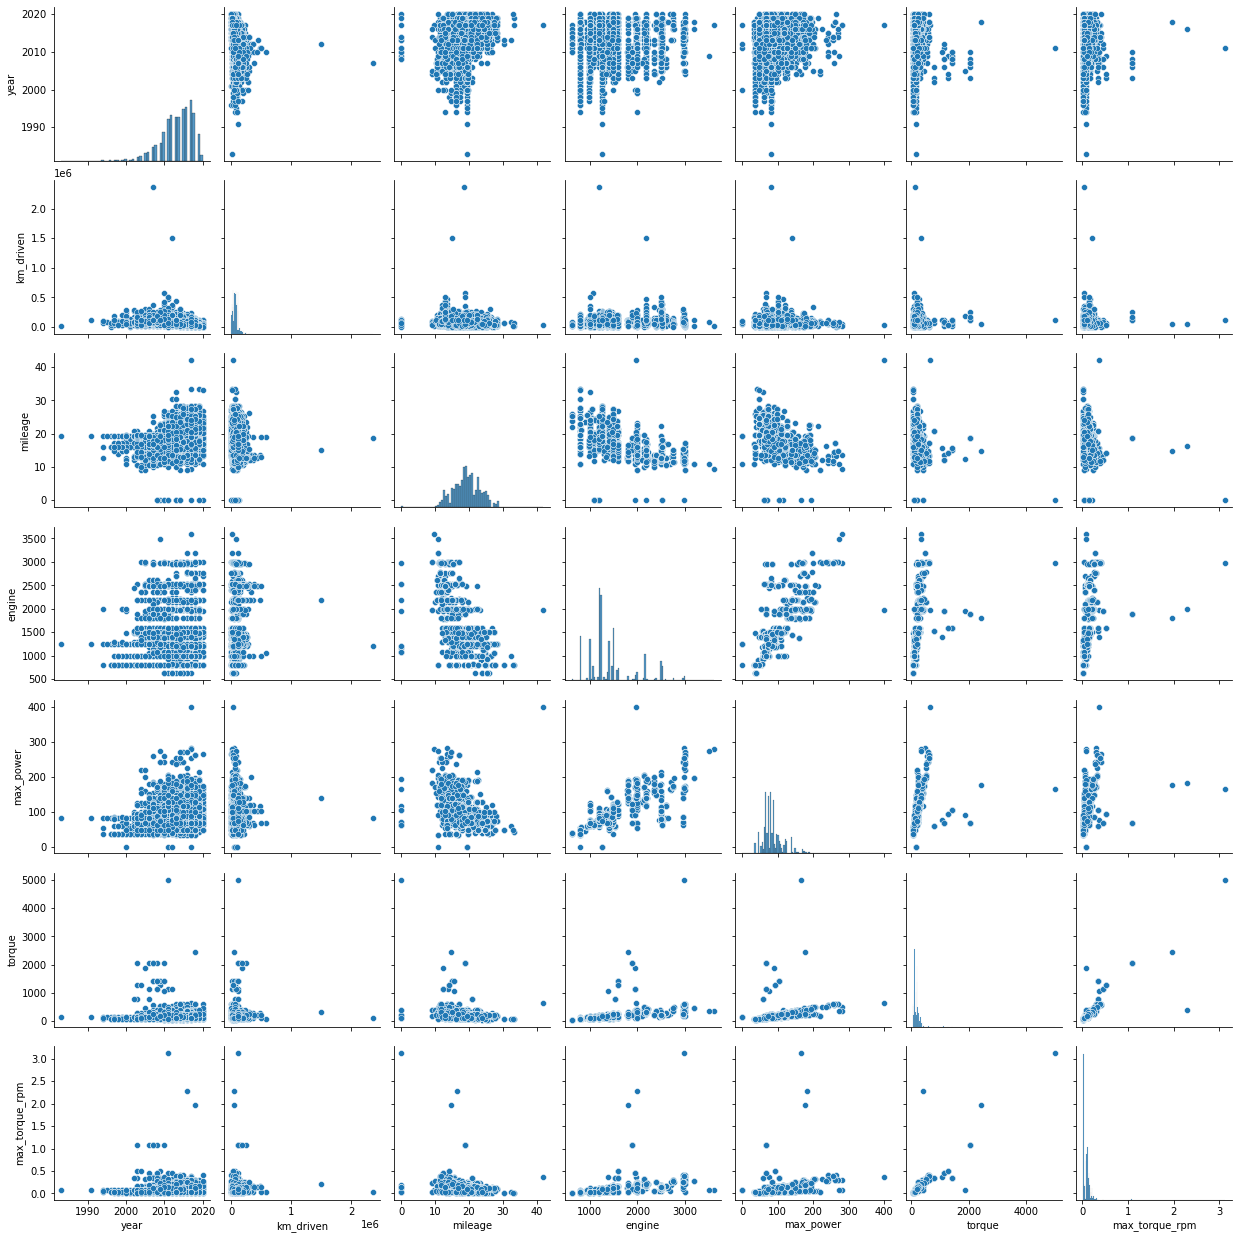

In [40]:
sns.pairplot(df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']])

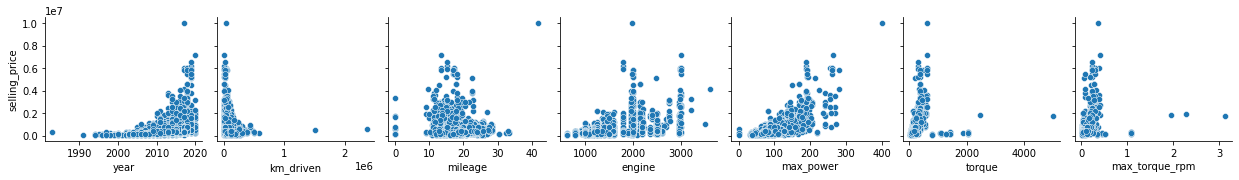

In [41]:
sns.pairplot(df_train, y_vars=['selling_price'], x_vars=['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm'])

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [42]:
print('Заметно, что у цены автомобиля есть положительная линейная связь с годом производства (чем младше автомобиль, тем дороже), а также негативная с пробегом (чем меньше пробег, тем дороже). Оба этих показателя - это показатели "новизны", однако, судя по графикам, между этими переменными нет значимой корреляции')

Заметно, что у цены автомобиля есть положительная линейная связь с годом производства (чем младше автомобиль, тем дороже), а также негативная с пробегом (чем меньше пробег, тем дороже). Оба этих показателя - это показатели "новизны", однако, судя по графикам, между этими переменными нет значимой корреляции


In [43]:
print('Также видна корреляция целевой переменной с "моментом силы" (torque) и max_torque_rpm, однако между ними наблюдается довольно сильная корреляция')

Также видна корреляция целевой переменной с "моментом силы" (torque) и max_torque_rpm, однако между ними наблюдается довольно сильная корреляция


In [44]:
print('При этом engine и max_power тоже выглядят скоррелироваными, однако целевая переменная выглядит более сильно зависящей от max_power')

При этом engine и max_power тоже выглядят скоррелироваными, однако целевая переменная выглядит более сильно зависящей от max_power


In [45]:
print('При этом mileage выглядит не очень сильно связанной с целевой переменной')

При этом mileage выглядит не очень сильно связанной с целевой переменной


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

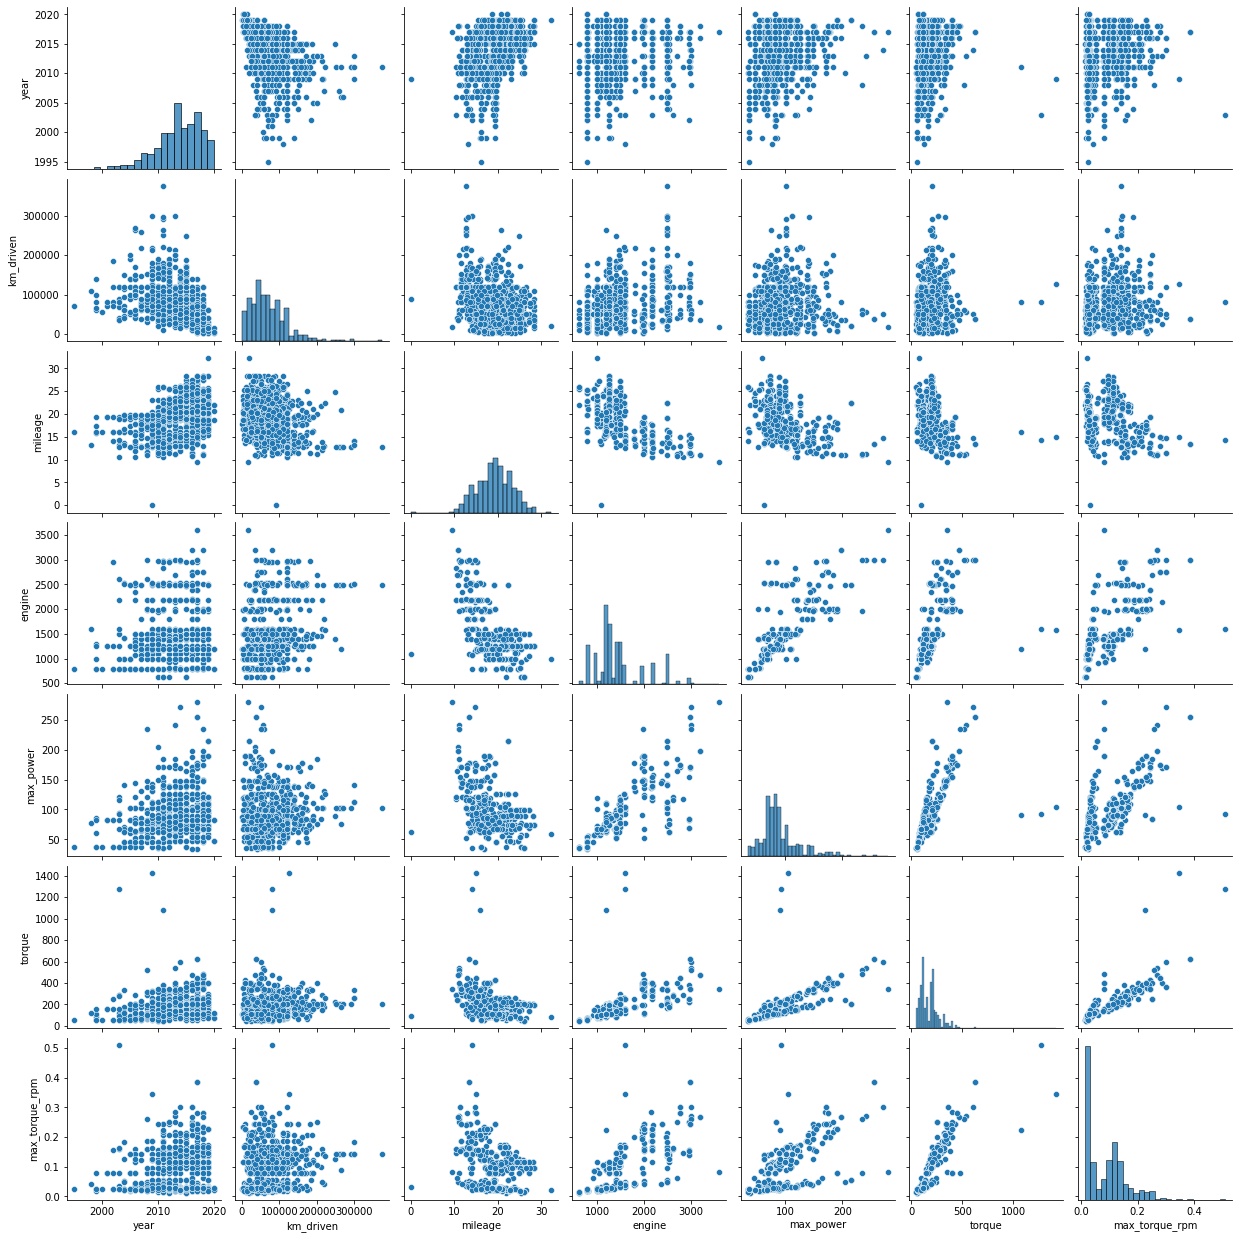

In [46]:
sns.pairplot(df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']])

In [47]:
print('Распределение test в pairplot выглядит похожим на train, однако в max_power наблюдается чуть более сильная корреляция с torque')

Распределение test в pairplot выглядит похожим на train, однако в max_power наблюдается чуть более сильная корреляция с torque


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot: >

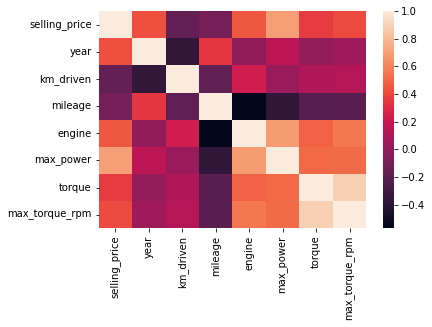

In [48]:
sns.heatmap(df_train[['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']].corr())

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [49]:
print('Судя по heatmap, наименее скореллированные признаки - это mileage и engine (что логично - пробег связан с пользователем автомобиля, а не с мощностью автомобиля, хотя можно предположить, что более мощные авто-спорткары реже используются владельцами, чем повседневные авто)')

Судя по heatmap, наименее скореллированные признаки - это mileage и engine (что логично - пробег связан с пользователем автомобиля, а не с мощностью автомобиля, хотя можно предположить, что более мощные авто-спорткары реже используются владельцами, чем повседневные авто)


In [50]:
print('Довольно сильная корреляция видна между torque и max_torque_rpm, а также между engine и max_power (связанные показатели для автомобиля)')

Довольно сильная корреляция видна между torque и max_torque_rpm, а также между engine и max_power (связанные показатели для автомобиля)


In [51]:
print('Между year и km_driven наблюдается отрицательная корреляция, однако уровень этой коррелляции чуть меньше 0.5. Поэтому мы можем сказать, что такая связь, возможно, есть, но она не выглядит довольно сильной')

Между year и km_driven наблюдается отрицательная корреляция, однако уровень этой коррелляции чуть меньше 0.5. Поэтому мы можем сказать, что такая связь, возможно, есть, но она не выглядит довольно сильной


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot: xlabel='torque', ylabel='max_torque_rpm'>

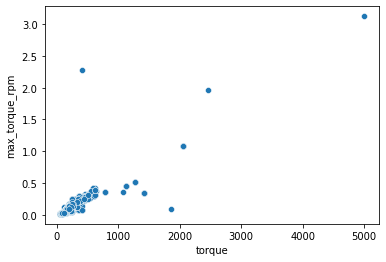

In [52]:
sns.scatterplot(x='torque', y='max_torque_rpm', data=df_train)

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [53]:
print("Есть предположение, что цена зависит линейно от года и пробега. Значит, построим линейный график, чтобы понять, не полиномиальная ли зависимость там")

Есть предположение, что цена зависит линейно от года и пробега. Значит, построим линейный график, чтобы понять, не полиномиальная ли зависимость там


<AxesSubplot: xlabel='year', ylabel='selling_price'>

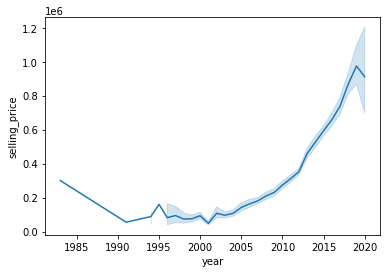

In [54]:
sns.lineplot(x="year", y="selling_price", data=df_train)

<AxesSubplot: xlabel='km_driven', ylabel='selling_price'>

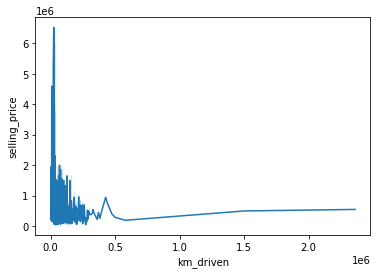

In [55]:
sns.lineplot(x="km_driven", y="selling_price", data=df_train)

In [56]:
print("Также очень полезно посмотреть join plot, чтобы сделать выводы о распредении целевой переменной")

Также очень полезно посмотреть join plot, чтобы сделать выводы о распредении целевой переменной


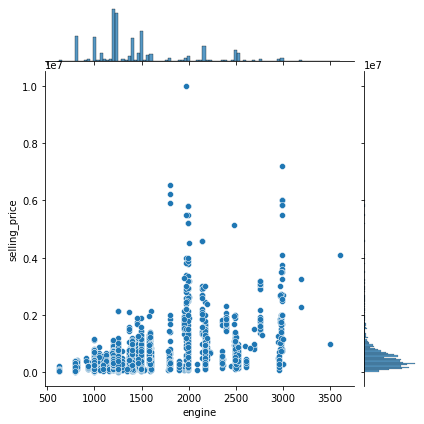

In [57]:
sns.jointplot(x='engine', y='selling_price', data=df_train)

In [58]:
print("Самая важная вещь в визуализации, которая может помочь - это контроль выбросов. Поэтому для облегчения работы далее в управлении выбросами может помочь ящик с усами")

Самая важная вещь в визуализации, которая может помочь - это контроль выбросов. Поэтому для облегчения работы далее в управлении выбросами может помочь ящик с усами


<AxesSubplot: ylabel='engine'>

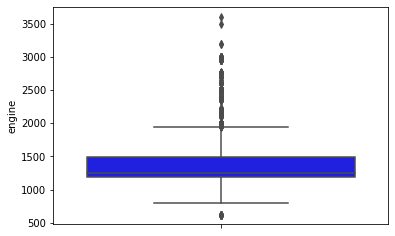

In [59]:
sns.boxplot(y='engine', data=df_train, color='blue')

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [60]:
df_train.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,0.095000
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,0.166667
2,2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,0.125525
3,3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,0.025061
4,4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,0.028438


In [61]:
y_train = df_train['selling_price']
X_train = df_train.drop(['selling_price', 'name', 'index', 'seller_type', 'transmission', 'owner', 'fuel'], axis=1, inplace=False)

In [62]:
X_train.head()

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,23.40,1248,74.00,190.000000,5,0.095000
1,2014,120000,21.14,1498,103.52,250.000000,5,0.166667
2,2010,127000,23.00,1396,90.00,219.668960,5,0.125525
3,2007,120000,16.10,1298,88.20,112.776475,5,0.025061
4,2017,45000,20.14,1197,81.86,113.750000,5,0.028438


In [63]:
# Changed 6 -> 8, as torque splitted into 2 columns
assert X_train.shape == (5840, 8)

In [64]:
y_test = df_test['selling_price']
X_test = df_test.drop(['selling_price', 'name', 'seller_type', 'transmission', 'owner', 'fuel'], axis=1, inplace=False)

In [65]:
# Changed 6 -> 8, as torque splitted into 2 columns
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as R2, mean_squared_error as MSE

linreg = LinearRegression()
linreg.fit(X=X_train, y=y_train)
linreg.coef_

array([ 3.74765554e+04, -7.68671131e-01,  4.09469612e+03,  7.42512847e+01,
        9.95091971e+03, -3.76304332e+02, -2.68797871e+04,  1.00840527e+06])

In [67]:
R2(y_train, linreg.predict(X_train))

0.5983281900660179

In [68]:
R2(y_test, linreg.predict(X_test))

0.5909202190981397

In [69]:
MSE(y_train, linreg.predict(X_train))

115134540164.68146

In [70]:
MSE(y_test, linreg.predict(X_test))

235150739596.70764

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
linreg_scaled = LinearRegression()
linreg_scaled.fit(X=X_train_scaled, y=y_train)

LinearRegression()

In [73]:
R2(y_train, linreg_scaled.predict(X_train_scaled))

0.5983281900660175

In [74]:
R2(y_test, linreg_scaled.predict(X_test_scaled))

0.5909202190981401

In [75]:
MSE(y_train, linreg_scaled.predict(X_train_scaled))

115134540164.6816

In [76]:
MSE(y_test, linreg_scaled.predict(X_test_scaled))

235150739596.70743

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [77]:
linreg_scaled.coef_

array([153476.66085956, -46170.99491849,  16319.95141033,  36058.00177184,
       315031.31365484, -53977.41089771, -26402.93540921,  93169.82761044])

In [78]:
X_train.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'],
      dtype='object')

In [79]:
print("Судя по весам, наиболее сильная связь наблюдается с max_power, то есть мощность мотора автомобиля влияет больше всего")

Судя по весам, наиболее сильная связь наблюдается с max_power, то есть мощность мотора автомобиля влияет больше всего


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [80]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X=X_train_scaled, y=y_train)

print(R2(y_train, lasso.predict(X_train_scaled)))
print(R2(y_test, lasso.predict(X_test_scaled)))
print('---')
print(MSE(y_train, lasso.predict(X_train_scaled)))
print(MSE(y_test, lasso.predict(X_test_scaled)))

0.5983281899722626
0.5909193854119033
---
115134540191.55534
235151218823.36276


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [81]:
lasso.coef_

array([153476.68591197, -46169.80962079,  16318.61325253,  36053.95604577,
       315031.40883625, -53968.53235132, -26399.65958025,  93161.76485018])

In [82]:
print('LASSO регрессия оставила веса такими же - хоть веса и кажутся большими по модулю, скорее всего, переобучения тут нет - размер весов обусловлен большим значениями целевой переменной (её мы не нормализовывали). Однако, возможно, просто параметры по умолчанию ограничивают возможности для нахождения переобучения - можно попробовать подобрать другие')

LASSO регрессия оставила веса такими же - хоть веса и кажутся большими по модулю, скорее всего, переобучения тут нет - размер весов обусловлен большим значениями целевой переменной (её мы не нормализовывали). Однако, возможно, просто параметры по умолчанию ограничивают возможности для нахождения переобучения - можно попробовать подобрать другие


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [83]:
%%time
from sklearn.model_selection import KFold, GridSearchCV

folds = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
y_folds = y_train.append(y_test)

lasso = Lasso()
parameters = {'alpha': [x / 100 for x in range(1, 100, 5)], 
              'max_iter': [1000, 2000, 3000, 5000],
              'selection': ['cyclic', 'random']}
gs = GridSearchCV(estimator = lasso, param_grid = parameters, cv = 10, n_jobs=-1)

gs.fit(y=y_folds, X=folds)
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

<timed exec>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Lasso(alpha=0.96, max_iter=5000, selection='random')
0.5810653207187866
{'alpha': 0.96, 'max_iter': 5000, 'selection': 'random'}
CPU times: user 508 ms, sys: 197 ms, total: 705 ms
Wall time: 3.31 s


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [84]:
print("Судя по выводу из %%time, время обучения составило 1.84 секунд")

Судя по выводу из %%time, время обучения составило 1.84 секунд


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [85]:
print(f"Коэффициент регуляризации - {gs.best_params_['alpha']}")
print(f"Веса - {gs.best_estimator_.coef_}")

Коэффициент регуляризации - 0.96
Веса - [155203.06953418 -55817.66908949  16470.62211275  40707.29141084
 340037.83936872 -46215.31321237 -36998.40534145  84164.99115958]


In [86]:
print("Как видно, и в данном случае не были занулены какие-либо веса. Соотвественно, либо список параметров для GridSearch был подобран неверно, либо в данной регрессии нет переобучения")

Как видно, и в данном случае не были занулены какие-либо веса. Соотвественно, либо список параметров для GridSearch был подобран неверно, либо в данной регрессии нет переобучения


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [87]:
%%time
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
parameters = {'alpha': [x / 100 for x in range(1, 100, 5)],
              'l1_ratio' : [x / 100 for x in range(1, 100, 5)],
              'max_iter': [1000, 2000, 3000, 5000],
              'selection': ['cyclic', 'random']}
gs = GridSearchCV(estimator = elastic_net, param_grid = parameters, cv = 10, n_jobs=-1)

gs.fit(y=y_folds, X=folds)
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

ElasticNet(alpha=0.51, l1_ratio=0.81)
0.5884504671923592
{'alpha': 0.51, 'l1_ratio': 0.81, 'max_iter': 1000, 'selection': 'cyclic'}
CPU times: user 6.59 s, sys: 1.17 s, total: 7.76 s
Wall time: 21.9 s


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [88]:
print(f"Лучшей оказалась модель с параметрами: {gs.best_params_}")

Лучшей оказалась модель с параметрами: {'alpha': 0.51, 'l1_ratio': 0.81, 'max_iter': 1000, 'selection': 'cyclic'}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [92]:
y_train_cat = df_train['selling_price']
X_train_cat = df_train.drop(['selling_price', 'name', 'index'], axis=1, inplace=False)

y_test_cat = df_test['selling_price']
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1, inplace=False)

In [93]:
X_train_cat.shape

(5840, 12)

In [94]:
# Changed 6 -> 8, as torque splitted into 2 columns
assert X_train_cat.shape == (5840, 12)

In [95]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [96]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

to_ohe = X_train_cat.describe(include='object').columns

for c in to_ohe:
    ohe = OneHotEncoder()
    transformed = ohe.fit_transform(X_train_cat[[c]])
    X_train_cat[ohe.categories_[0]] = transformed.toarray()
    transformed_test = ohe.transform(X_test_cat[[c]])
    X_test_cat[ohe.categories_[0]] = transformed_test.toarray()
    X_train_cat.drop([c], axis=1, inplace=True)
    X_test_cat.drop([c], axis=1, inplace=True)

In [97]:
# Drop a column to avoid multicollinearity
X_train_cat.drop(['Diesel', 'Dealer', 'Automatic', 'First Owner'], axis=1, inplace=True)
X_test_cat.drop(['Diesel', 'Dealer', 'Automatic', 'First Owner'], axis=1, inplace=True)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [98]:
%%time
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

folds = np.concatenate((X_train_cat, X_test_cat), axis=0)
y_folds = y_train.append(y_test)

ridge = Ridge()
parameters = {'alpha': [x / 100 for x in range(1, 100, 5)]}
gs_ridge = GridSearchCV(estimator = ridge, param_grid = parameters, cv = 10, n_jobs=-1, scoring='r2')

gs_ridge.fit(y=y_folds, X=folds)
print(gs_ridge.best_estimator_)
print(gs_ridge.best_score_)
print(gs_ridge.best_params_)

Ridge(alpha=0.96)
0.6167448622066358
{'alpha': 0.96}
CPU times: user 96.4 ms, sys: 49.3 ms, total: 146 ms
Wall time: 177 ms


<timed exec>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [99]:
print(f"Качество модели действительно улучшилось - R^2 вырос с {gs.best_score_} до {gs_ridge.best_score_}")

Качество модели действительно улучшилось - R^2 вырос с 0.5884504671923592 до 0.6167448622066358


# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [100]:
# Уберём выбросы из данных по ценам
OUTLIER_STD_COEF = 2.5

sp_mean = np.mean(df_train['selling_price'])
sp_std = np.std(df_train['selling_price'])
df_train['outlier'] = df_train['selling_price'].apply(lambda x: 1 if abs(x - sp_mean) > OUTLIER_STD_COEF * sp_std else 0)

df_train = df_train[df_train['outlier'] == 0]
df_train.drop(['outlier'], axis=1, inplace=True)

/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_33783/1004875743.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['outlier'], axis=1, inplace=True)


In [101]:
y_train_cat = df_train['selling_price']
X_train_cat = df_train.drop(['selling_price', 'name', 'index'], axis=1, inplace=False)
print(X_train_cat.shape)

y_test_cat = df_test['selling_price']
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1, inplace=False)
print(X_test_cat.shape)

from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

to_ohe = X_train_cat.describe(include='object').columns

for c in to_ohe:
    ohe = OneHotEncoder(handle_unknown='ignore')
    transformed = ohe.fit_transform(X_train_cat[[c]])
    X_train_cat[ohe.categories_[0]] = transformed.toarray()
    transformed_test = ohe.transform(X_test_cat[[c]])
    X_test_cat[ohe.categories_[0]] = transformed_test.toarray()
    X_train_cat.drop([c], axis=1, inplace=True)
    X_test_cat.drop([c], axis=1, inplace=True)

# Drop a column to avoid multicollinearity
X_train_cat.drop(['Diesel', 'Dealer', 'Automatic', 'First Owner'], axis=1, inplace=True)
X_test_cat.drop(['Diesel', 'Dealer', 'Automatic', 'First Owner'], axis=1, inplace=True)

(5717, 12)
(1000, 12)


In [102]:
# Уберём max_torque_rpm - потенциальна мультиколлинеарность с torque
X_train_cat.drop(['max_torque_rpm'], axis=1, inplace=True)
X_test_cat.drop(['max_torque_rpm'], axis=1, inplace=True)

In [103]:
# Добавим логарифмический признак для year
X_train_cat['year_log'] = X_train_cat['year'].apply(lambda x: np.log(x))
X_test_cat['year_log'] = X_test_cat['year'].apply(lambda x: np.log(x))

In [106]:
# Добавим "износ вождения" - km_driven / years (чтобы учитывать машины, которые стояли в гараже, но на них не ездили)
X_train_cat['exhaustion'] = X_train_cat['km_driven'] / X_train_cat['year']
X_test_cat['exhaustion'] = X_test_cat['km_driven'] / X_test_cat['year']

In [107]:
# Добавим силу на мощность мотора
X_train_cat['capacity'] = X_train_cat['max_power'] / X_train_cat['engine']
X_test_cat['capacity'] = X_test_cat['max_power'] / X_test_cat['engine']

In [108]:
# Из названия авто возьмём название марки авто, примением OneHotEncoder, чтобы категоризовать
X_train_cat['brand'] = df_train['name'].apply(lambda x: x.split(' ')[0])
X_test_cat['brand'] = df_test['name'].apply(lambda x: x.split(' ')[0])

In [109]:
ohe = OneHotEncoder(handle_unknown='ignore')
transformed = ohe.fit_transform(X_train_cat[['brand']])
X_train_cat[ohe.categories_[0]] = transformed.toarray()
transformed_test = ohe.transform(X_test_cat[['brand']])
X_test_cat[ohe.categories_[0]] = transformed_test.toarray()
X_train_cat.drop(['brand'], axis=1, inplace=True)
X_test_cat.drop(['brand'], axis=1, inplace=True)

In [110]:
X_train_cat

,year,km_driven,mileage,engine,max_power,torque,seats,CNG,LPG,Petrol,...,Mercedes-Benz,Mitsubishi,Nissan,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014,145500,23.40,1248,74.00,190.000000,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,250.000000,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,219.668960,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,112.776475,5,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,113.750000,5,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100000,5,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,2013,50000,18.90,998,67.10,90.000000,5,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,2013,110000,18.50,1197,82.85,113.700000,5,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,2007,119000,16.80,1493,110.00,235.359600,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
X_train_cat.drop(['Nissan'], axis=1)
X_test_cat.drop(['Nissan'], axis=1)
X_train_cat.shape

(5717, 47)

In [112]:
model = Ridge(alpha=0.96)
model.fit(y=y_train_cat, X=X_train_cat)

print(R2(y_train_cat, model.predict(X_train_cat)))
print(MSE(y_train_cat, model.predict(X_train_cat)))

0.7796744820686249
20973234396.266506


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [118]:
def business_metrics(y_true, y_pred, tolerance=0.1):
    n_predicted = len(y_true)
    correct = 0
    for i in range(len(y_pred)):
        rel_score = y_pred[i] / y_true[i]
        if 1 - tolerance <= rel_score <= 1 + tolerance:
            correct += 1
    return correct / n_predicted

business_metrics(y_true=y_test_cat, y_pred=model.predict(X_test_cat))

0.28

In [117]:
import pickle

pickle.dump(model, open('model_data.pkl', 'wb'))

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [122]:
df_train.loc[6].to_json('cars_test.json')

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link